In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.cm as cm
#!pip install plotly
np.random.seed(5)

# Importation des données et visualisation

### On importe

In [14]:
dfmall=pd.read_csv("Mall_customers.csv")

### On modifie notre donnée qualitative Genre dans un format utilisable

Male = 0 
Female = 1

In [15]:
dfmall
dfmall['binary']= dfmall.iloc[:,1].apply(lambda x: 
                                         0 if x=="Male"
                                         else
                                        1)
dfmall

X=dfmall.iloc[:,[2,3,4,5]]

### On visualise
D'abords avec une matrice de correlation <br/>
Puis avec un pairplot <br/>
Celà nous servira pour choisir nos visualisation du modèle <br/>

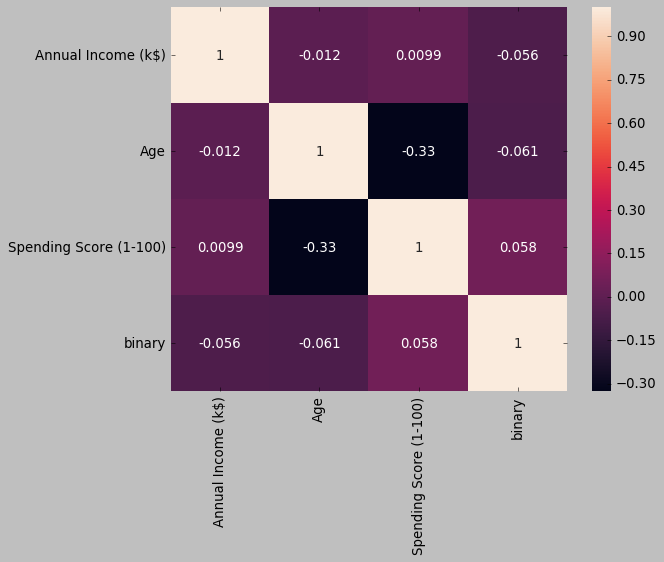

In [16]:
sns.heatmap(dfmall.iloc[:,[3,2,4,5]].corr(), annot=True)

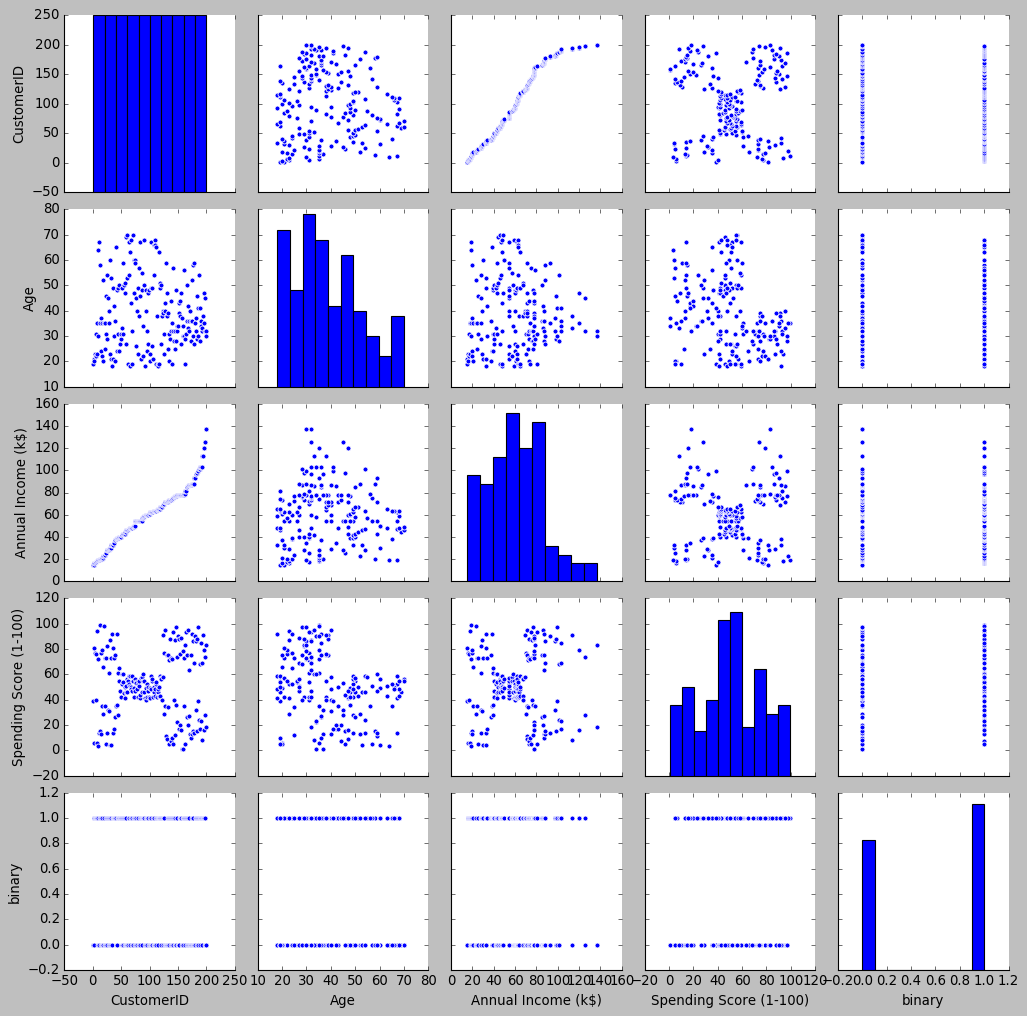

In [17]:
sns.pairplot(dfmall)

On remarque entre les spending score et l'annual income 5 cluster potentiel partons sur cette hypothèse de départ et sur ces deux paramètres 

Remarque: L'age pourrait avoir un impact également  avec potentielement 3 cluster vis à vis du spending score


# Modélisation

## Approche empyrique 

### 5 cluster Annual Income / Spending Score

On fixe donc notre nombre de cluster à 5 et nous initions le modèle

In [18]:
knm5=KMeans(5, random_state=42) # 5 = nombre de cluster, 42 = fixer les nombres aléatoires

In [19]:
knm5.fit(dfmall.iloc[:,[2,3,4,5]]) #entrainer mes données numériques

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [20]:
knm5.labels_ #Affichage de l'appartenance des données aux clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [21]:
knm5.cluster_centers_ #affichage des coordonnées des centres des clusters

array([[40.66666667, 87.75      , 17.58333333,  0.47222222],
       [43.08860759, 55.29113924, 49.56962025,  0.58227848],
       [25.52173913, 26.30434783, 78.56521739,  0.60869565],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154],
       [45.2173913 , 26.30434783, 20.91304348,  0.60869565]])

Text(0.5, 1.0, 'Vision Age x Spending Score')

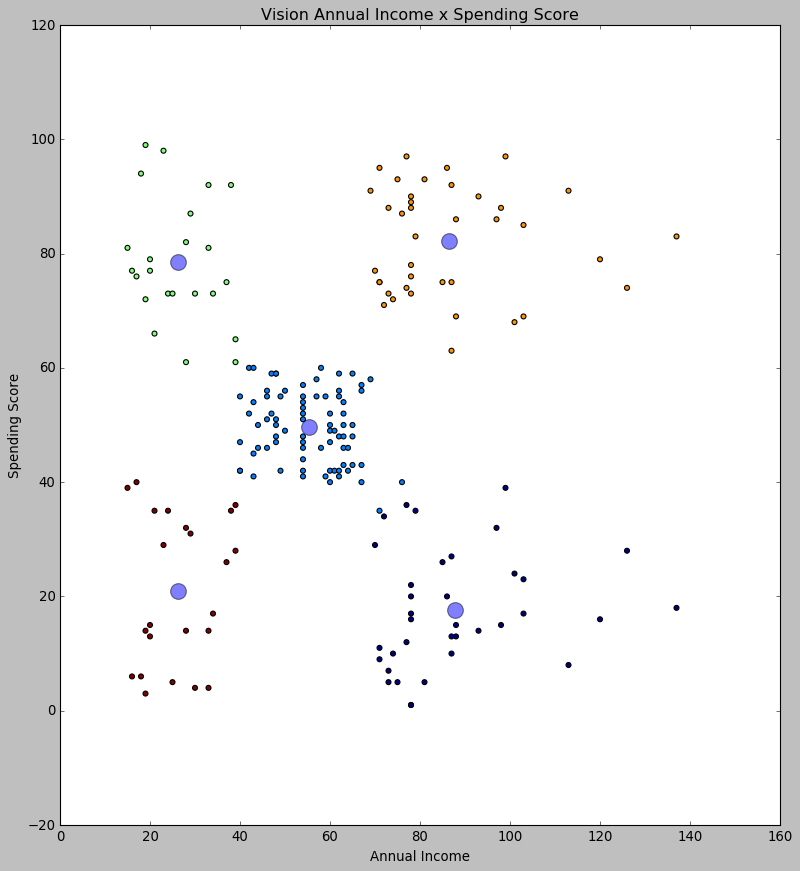

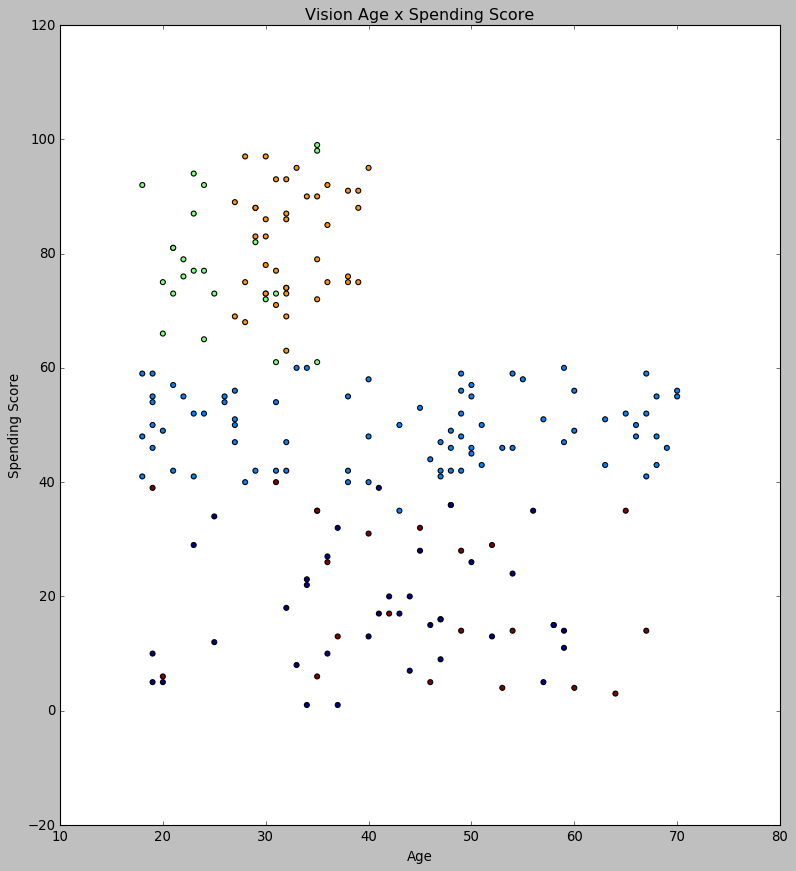

In [22]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')


fig=plt.figure(1,figsize=[9,10])

ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=knm5.labels_) #création de nos cluster
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Annual Income x Spending Score')
centers = knm5.cluster_centers_ #ajout des centres de nos clusters 
plt.scatter(centers[:, 1], centers[:, 2], s=200, alpha=0.5)


fig=plt.figure(2,figsize=[9,10]) #deuxième graphique de cluster avec des variables différentes.
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,2], dfmall.iloc[:,4], c=knm5.labels_)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Age x Spending Score')

Text(0.5, 0.92, 'Clustering 5')

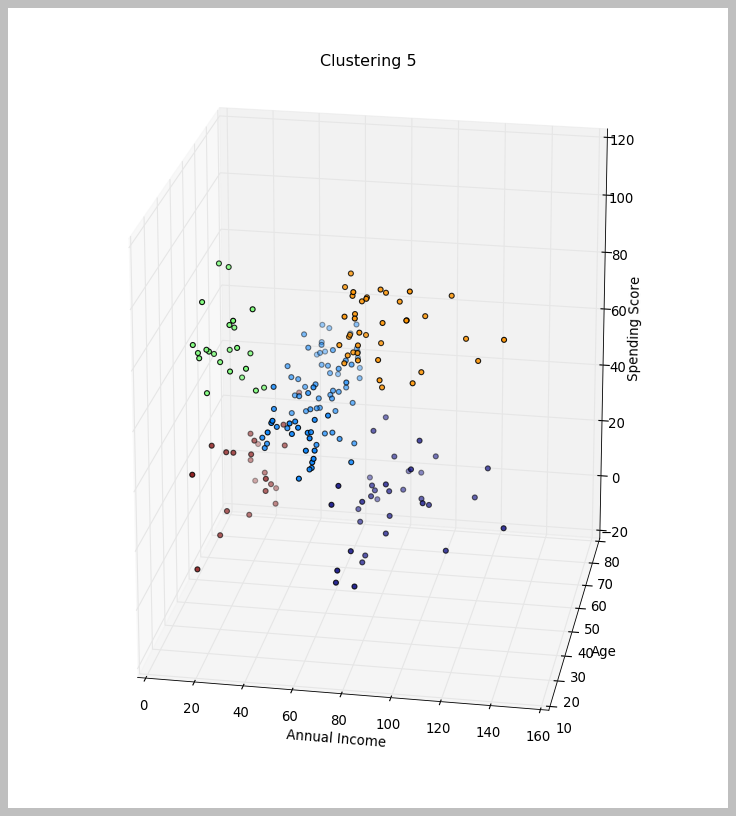

In [23]:
fig=plt.figure(figsize=[9,10])

ax=Axes3D(fig,elev=20, azim=-80)
ax.scatter(dfmall.iloc[:,3],dfmall.iloc[:,2],dfmall.iloc[:,4],
          c=knm5.labels_, edgecolor="k") #Affichage de nos clusters en 3D
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.set_title('Clustering 5')

## 3 Cluster Age / Spending Score

In [24]:
#On initialise le modèle avec 3 clusters
kmn3= KMeans(3)
#On l'entrainne
kmn3.fit(dfmall.iloc[:,[2,3,4,5]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Spending Score')

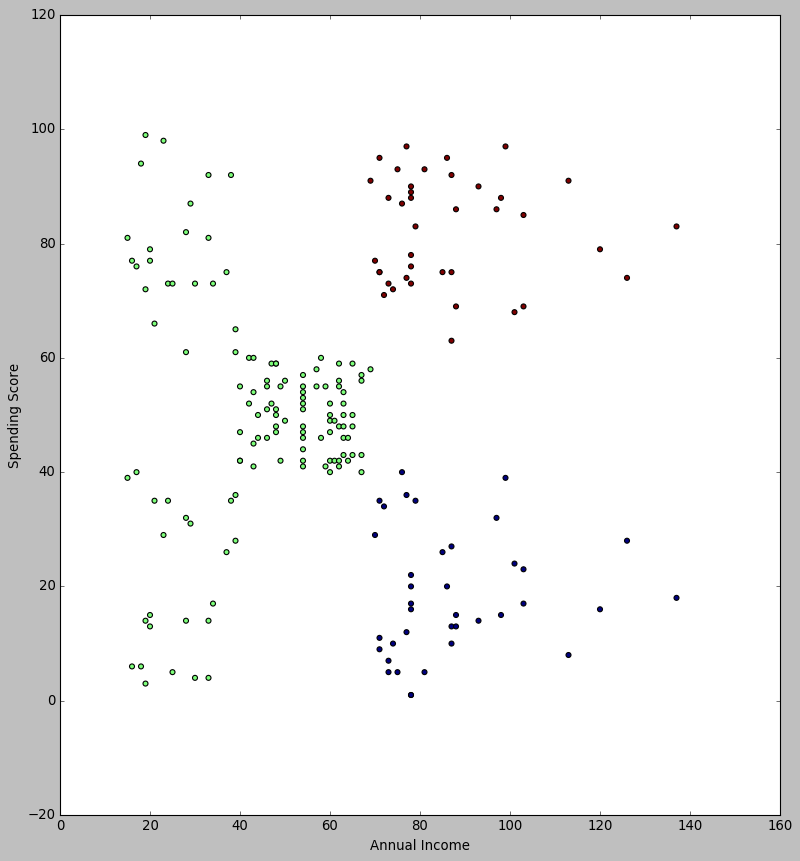

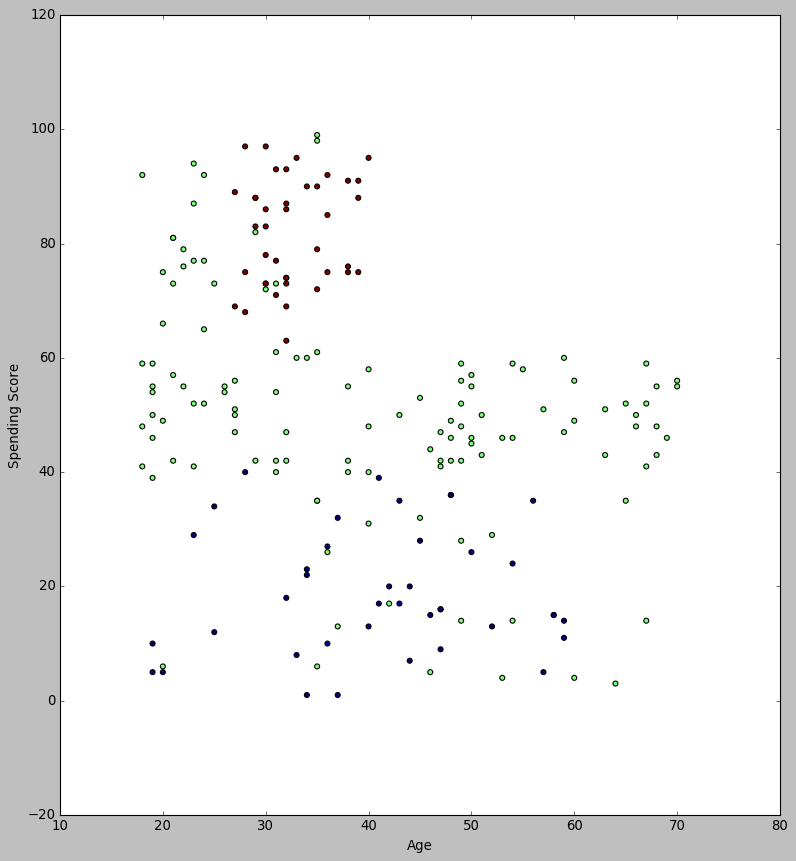

In [25]:
#On visualise avec nos 3 variable retiré Annual Income, Spending Score et Age
fig=plt.figure(1,figsize=[9,10])
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=kmn3.labels_)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')

fig=plt.figure(2,figsize=[9,10])
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,2], dfmall.iloc[:,4], c=kmn3.labels_)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')

Text(0.5, 0.92, 'Clustering 3')

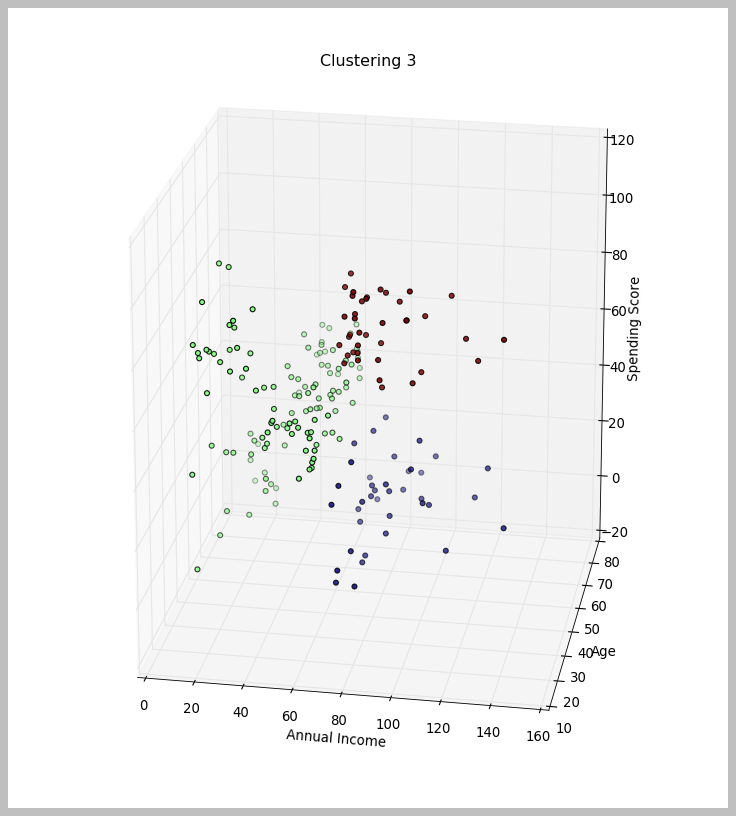

In [26]:
#On visualise en 3D avec nos 3 axes d'études

fig=plt.figure(figsize=[9,10])

ax=Axes3D(fig,elev=20, azim=-80)
ax.scatter(dfmall.iloc[:,3],dfmall.iloc[:,2],dfmall.iloc[:,4],
          c=kmn3.labels_, edgecolor="k")
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.set_title('Clustering 3')

# Méthode Elbow


La méthode elbow consiste à poser une courbe qui prend la somme des variance par rapport au nombre de cluster choisi. Celà nous aide à choisir le bon nombre de cluster pour maximiser l'intérêt (C'est à dire miniser à la fois la somme des variances et le nombre de cluster). celà ce repére visuelement par la cassure de la courbe

### On créer notre courbe Elbow à la main

Text(0.5, 1.0, 'Elbow curve')

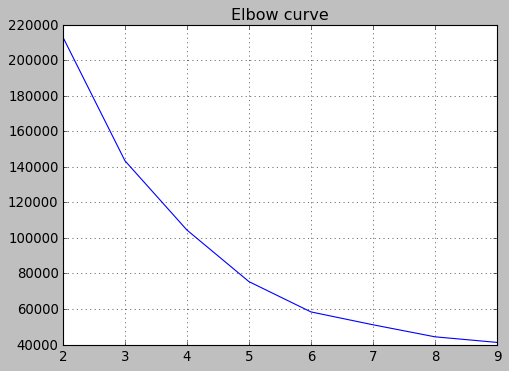

In [29]:
#A la mains


distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
#création de la courbe Elbow pour connaître combien de cluster on a besoin
fig = plt.figure(figsize=(7, 5))
plt.plot(range(2,10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Ici il n'est pas évident de faire un choix définitif entre 5 6 et 3 car les cassures sont peu prononcé on va essayé une bibliothéque plus précise.

### Utilisation de Yellow Brick

In [116]:
#Avec Yellow brick
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


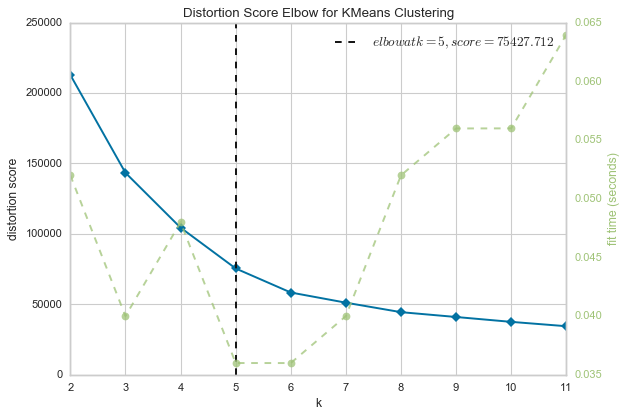

In [117]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
#Avec Yellow Bricks on va rendre plus joli et plus lisible notre courbe elbow.
visualizer.fit(X)
visualizer.show()

On se rend directement compte grâce à ce graphique que le meilleur nombre de cluster est le 5.
On a aussi quelques information utile comme la rapidité d'execution.

# Travail sur le 5 cluster -- Exploration et Explication

<b> On stocks les labels créé par notre model initialisé à 5 Cluster dans notre DataFrame. </b>

In [32]:
dfmall['Cluster']=knm5.labels_
dfmall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),binary,Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,3
198,199,Male,32,137,18,0,0


<b> On visualise nos clusters en terme de nombre pour repérer un groupe prédominant.

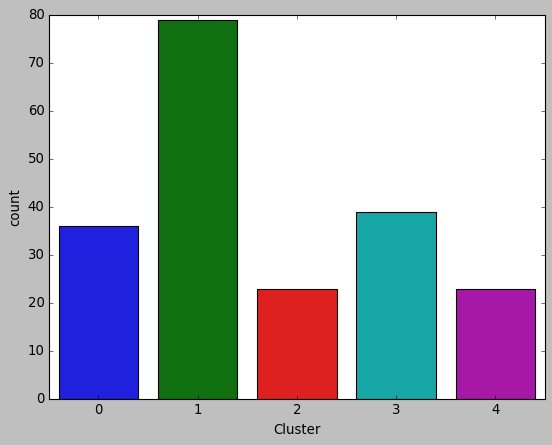

In [33]:
sns.countplot(dfmall['Cluster'])  #on compte le nombre de cas par clusters

<b> Ce n'est pas très parlant essayons de donner des noms à ces groupes (Pour celà nous allons étudier les moyennes de ces groupes.)</b>

In [118]:
#On créer une boucle pour remplir 3 Listes qui vont nous permettre de remplir un DataFrames.

moy=[]
moye=[]
group=[]
uni=dfmall.iloc[:,6].unique()
for n in uni:
    moy.append(dfmall.iloc[:,3].loc[dfmall.iloc[:,6]== n].mean()),
    moye.append(dfmall.iloc[:,4].loc[dfmall.iloc[:,6]== n].mean()),
    group.append(n)
    #Moyenne de nos colonnes en fonction des clusters.

In [35]:
data = {'Groupe':  group,
        'Income_Moyen': moy,
        'Spending_Score_moyen':moye
       }
dfmoyenne=pd.DataFrame(data, columns = ['Groupe','Income_Moyen','Spending_Score_moyen'])
#Création du dataframe de nos 5 clusters, de la moyenne et du speding score moyen

In [36]:
dfmoyenne.sort_values("Income_Moyen")
#On retrouve une similitude entre ces moyennes et les centres des clusters.

,Groupe,Income_Moyen,Spending_Score_moyen
0,4,26.304348,20.913043
1,2,26.304348,78.565217
2,1,55.291139,49.569620
3,3,86.538462,82.128205
4,0,87.750000,17.583333


On peut comprendre nos 5 catégories et les expliquer en 3 grand groupes: Les riches, la classe moyenne et les pauvres. Dans ces catégorie on peut isoler 2 sous groupe qui ont des attitude atypique à leur groupes. 
En effet en règle général les dépense du ménage varie en fonction de leur revenue annuel moyen. <br/>
<br/>

Cependant on peut remarquer que certain haut revenu dépense peu  et que certain bas revenu dépense beaucoup. 

Celà nous donne donc 5 catégorie.

In [37]:
dfmoyenne["Category_clients"]= dfmoyenne.iloc[:,0].apply(lambda x: 
                                                         "G2" if x==2
                                                         else "G1" if x==4
                                                         else "G3" if x== 1
                                                         else "G4" if x==3
                                                         else "G5" )


In [38]:
dfmall["Category_clients"]= dfmall.iloc[:,6].apply(lambda x: 
                                                         "G2" if x==2
                                                         else "G1" if x==4
                                                         else "G3" if x==1
                                                         else "G4" if x==3
                                                         else "G5" )

In [39]:
#Les données des hommes
dfmall.loc[dfmall.iloc[:,5]==0].describe()
#description et affichage des revenues et depenses des hommes uniquement

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),binary,Cluster
count,88.000000,88.000000,88.000000,88.000000,88.0,88.000000
mean,104.238636,39.806818,62.227273,48.511364,0.0,1.602273
std,57.483830,15.514812,26.638373,27.896770,0.0,1.309029
min,1.000000,18.000000,15.000000,1.000000,0.0,0.000000
25%,59.500000,27.750000,45.500000,24.500000,0.0,1.000000
50%,106.500000,37.000000,62.500000,50.000000,0.0,1.000000
75%,151.250000,50.500000,78.000000,70.000000,0.0,3.000000
max,200.000000,70.000000,137.000000,97.000000,0.0,4.000000


In [40]:
#Les données des femmes
dfmall.loc[dfmall.iloc[:,5]==1].describe()
#même chose pour les femmes

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),binary,Cluster
count,112.000000,112.000000,112.000000,112.000000,112.0,112.000000
mean,97.562500,38.098214,59.250000,51.526786,1.0,1.723214
std,58.276412,12.644095,26.011952,24.114950,0.0,1.281960
min,3.000000,18.000000,16.000000,5.000000,1.0,0.000000
25%,46.750000,29.000000,39.750000,35.000000,1.0,1.000000
50%,94.500000,35.000000,60.000000,50.000000,1.0,1.000000
75%,148.250000,47.500000,77.250000,73.000000,1.0,3.000000
max,197.000000,68.000000,126.000000,99.000000,1.0,4.000000


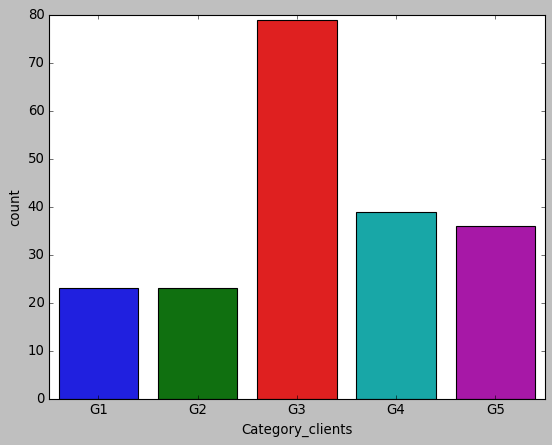

In [41]:
sns.countplot(dfmall['Category_clients'])
#counplot avec nos nouveaux noms pour les groupes

<b>On remarque donc plusieur angles d'attaque:</b> <br/>
<br/>
La classe moyenne est de loin la plus nombreuse et reste relativement homogène. Peut-être peut-on les pousser à consommer d'avantage ? Ou en tout cas cherché à la fidélisé le plus possible.
<br/>
<br/>
La classe dépensier peut être un angle aussi car si ces clients ce surendéte ils finiront par ne plus consommer
du tout.
<br/>
<br/>
Enfin communiquer sur ces riches qui ne dépense pas peut-être intéressant car de toute évidence le magasin ne les touchent pas efficacement et leur dépense son relativement faible comparé aux autres.

### Silhouette 

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

Text(0, 0.5, 'Feature space for the 2nd feature')

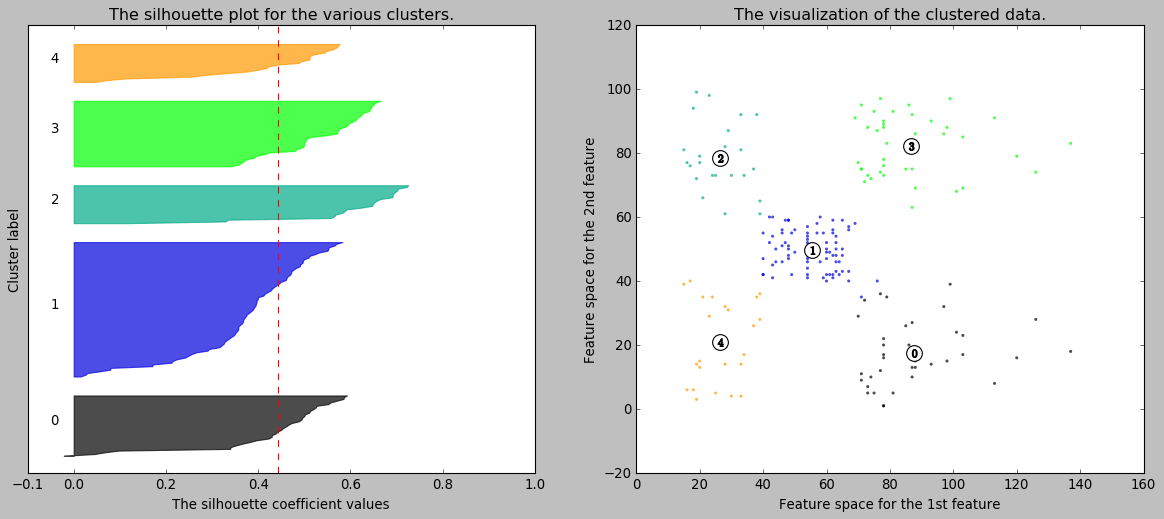

In [43]:

#bouxcle qui paecours les labels
#impleemtationd es silhouette 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (5 + 1) * 10])
knm5
sil= silhouette_score(X, knm5.labels_ )
sil_values = silhouette_samples(X, knm5.labels_)
y_lower = 10
for i in range(5):
        ith_cluster_silhouette_values = \
            sil_values[knm5.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0] #forme du plot
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=sil, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(knm5.labels_.astype(float) / 5)
ax2.scatter(X.iloc[:, 1], X.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

    
centers = knm5.cluster_centers_
    
ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

In [46]:
print("Score de Silhouette", sil)

Score de Silhouette 0.4440669204743008


# Différents Modèles de Clusters

## MeanShift (Etude du mode)

In [47]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [48]:
brand= estimate_bandwidth(X,quantile=0.1, n_jobs=-1)
mst= MeanShift(brand)
mst.fit(X)
#Meanshift va lui même choisir les clusters en fonction de ce qu'il trouve

MeanShift(bandwidth=22.186810430222966, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [49]:
labels_unique = np.unique(mst.labels_)
cl=len(labels_unique)
print('Nombre de cluster estimé :', cl)

Nombre de cluster estimé : 5


number of estimated clusters : 5


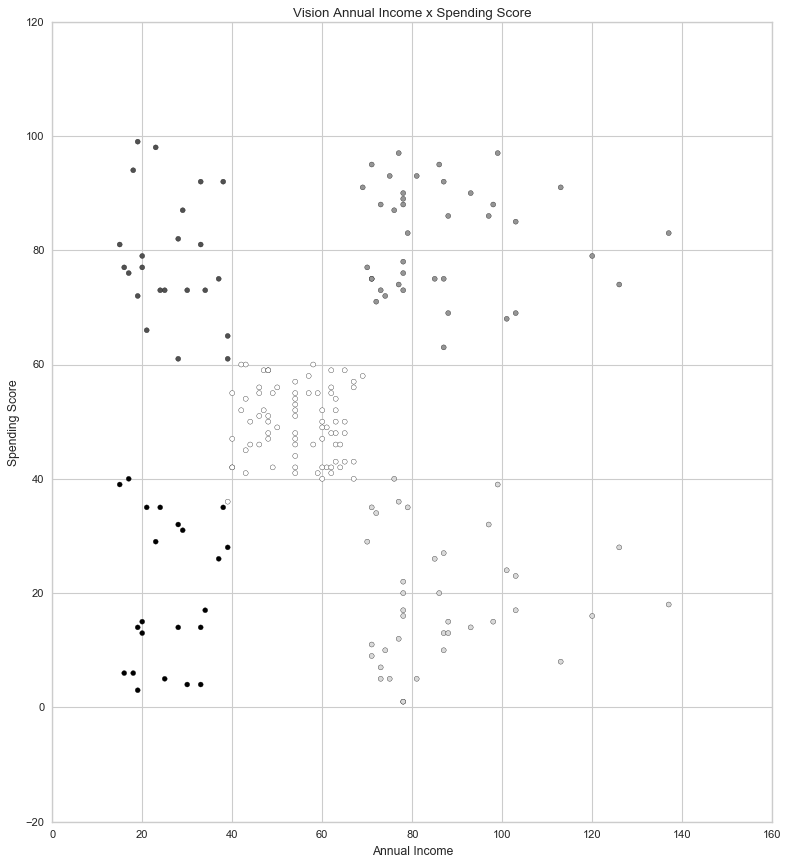

In [121]:
X= dfmall.iloc[:,[3,4]]
bandwidth = estimate_bandwidth(X, quantile=0.15, n_jobs=-1)

ms = MeanShift(bandwidth=bandwidth, cluster_all = True, max_iter=30)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

fig=plt.figure(1,figsize=[9,10])

ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=ms.labels_)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Annual Income x Spending Score')

print("number of estimated clusters :", len(ms.cluster_centers_))

#5 clusters ont été trouvés, avec notre paramètre quantile = 0,15
#Si on avait mis 0,1 il aurait trouvé 7 clusters.
#Ce paramètre permet de définir le périmètre de nos clusters.

## Mini Batch Kmeans (comparaison)

In [72]:
from sklearn.cluster import MiniBatchKMeans

In [97]:
mbk = MiniBatchKMeans(n_clusters=5,random_state=42, batch_size = 50)
#le batch means va permettre de créer des clusters en séparant les données

In [98]:
mbk.fit(X)

MiniBatchKMeans(batch_size=50, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [99]:
mbk.labels_

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [90]:
X

,Age,Annual Income (k$),Spending Score (1-100),binary
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


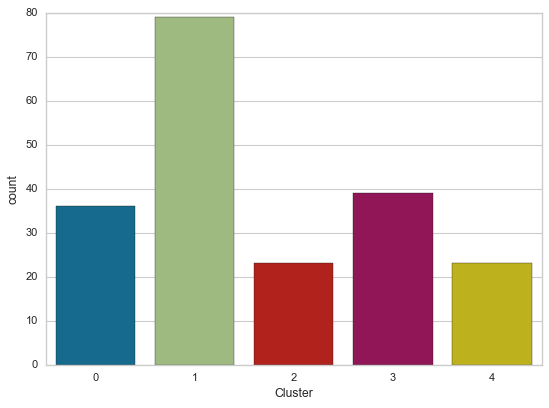

In [125]:
dfmall["Cluster_mbk"]=mbk.labels_
dfmall
#identical=dfmall.loc[dfmall.iloc[:,6]==dfmall.iloc[:,8]]
dfmall["compare"]=dfmall.iloc[:,6] - dfmall.iloc[:,8]
sns.countplot(dfmall['Cluster'])
#soustraction des premiers cluster du k means - celui du mini batch 

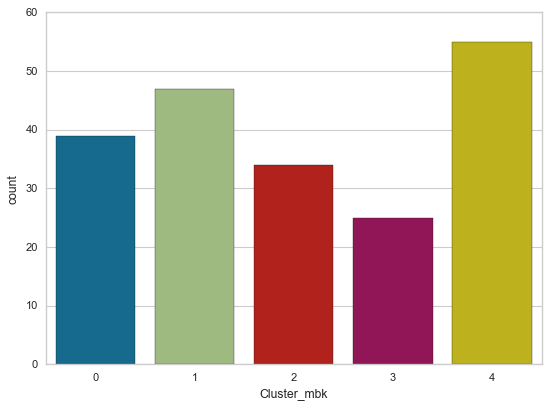

In [124]:
sns.countplot(dfmall['Cluster_mbk'])


Les clusters semble identique mais les labels ont été shuffle tachons de les remettres en ordre

In [79]:
moy2=[]
moye2=[]
group2=[]
uni2=dfmall.iloc[:,8].unique()
for n in uni:
    moy2.append(dfmall.iloc[:,3].loc[dfmall.iloc[:,8]== n].mean()),
    moye2.append(dfmall.iloc[:,4].loc[dfmall.iloc[:,8]== n].mean()),
    group2.append(n)
    #On fait la moyenne des 2 variables pour chaque clusters
data2 = {'Groupe':  group2,
        'Income_Moyen': moy2,
        'Spending_Score_moyen':moye2
       }
dfmoyenne2=pd.DataFrame(data2, columns = ['Groupe','Income_Moyen','Spending_Score_moyen'])
#On implémente les données dans un nouveau dataFrame

In [92]:
dfmoyenne2 #Affichage de nos moyennes
#On remarque une similitude entre les moyennes et les coordonnées de nos centres de clusters

,Groupe,Income_Moyen,Spending_Score_moyen
0,4,25.727273,20.227273
1,2,28.730769,76.153846
2,1,87.432432,18.189189
3,3,55.118421,49.197368
4,0,86.538462,82.128205


In [81]:
dfmoyenne 

,Groupe,Income_Moyen,Spending_Score_moyen,Category_clients
0,4,26.304348,20.913043,G1
1,2,26.304348,78.565217,G2
2,1,55.291139,49.569620,G3
3,3,86.538462,82.128205,G4
4,0,87.750000,17.583333,G5


Correpondance des Clusters :  4=4 2=2 1=0 3=1 0=3

In [2]:
dfmall2=dfmall
dfmall2["Cluster_mbk"]= dfmall.iloc[:,8].apply(lambda x: 
                                                         4 if x==4
                                                         else 0 if x==1
                                                         else 2 if x==2
                                                         else 1 if x==3
                                                         else 3 )
#aprrès nos correspondance trouvé, on va changer les noms des lmabels

NameError: name 'dfmall' is not defined

In [83]:
dfmall2['compare']=dfmall2['Cluster']-dfmall2['Cluster_mbk']
dfmall2['compare']= dfmall2.iloc[:,9].apply(lambda x:
                                          1 if x==0
                                          else 0)
dfmall2.iloc[:,9].value_counts()

1    195
0      5
Name: compare, dtype: int64

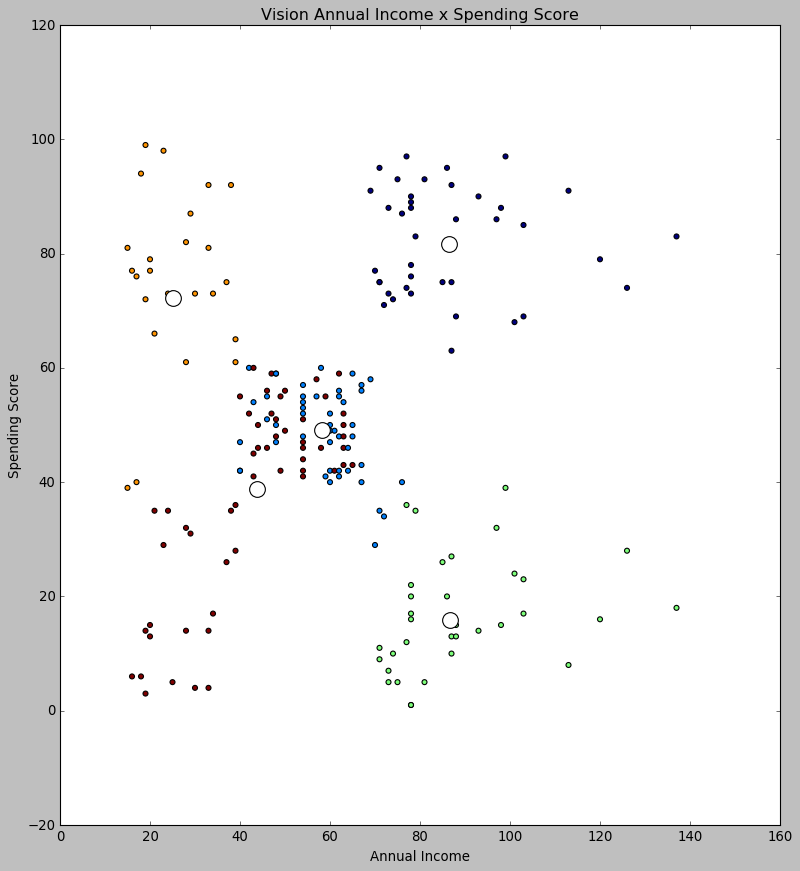

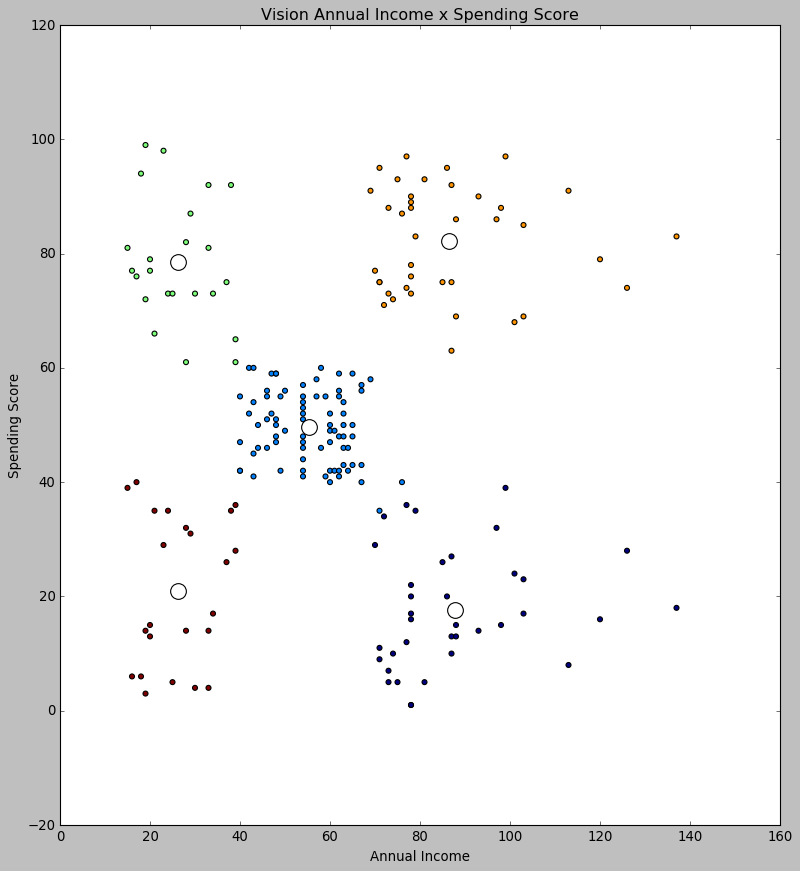

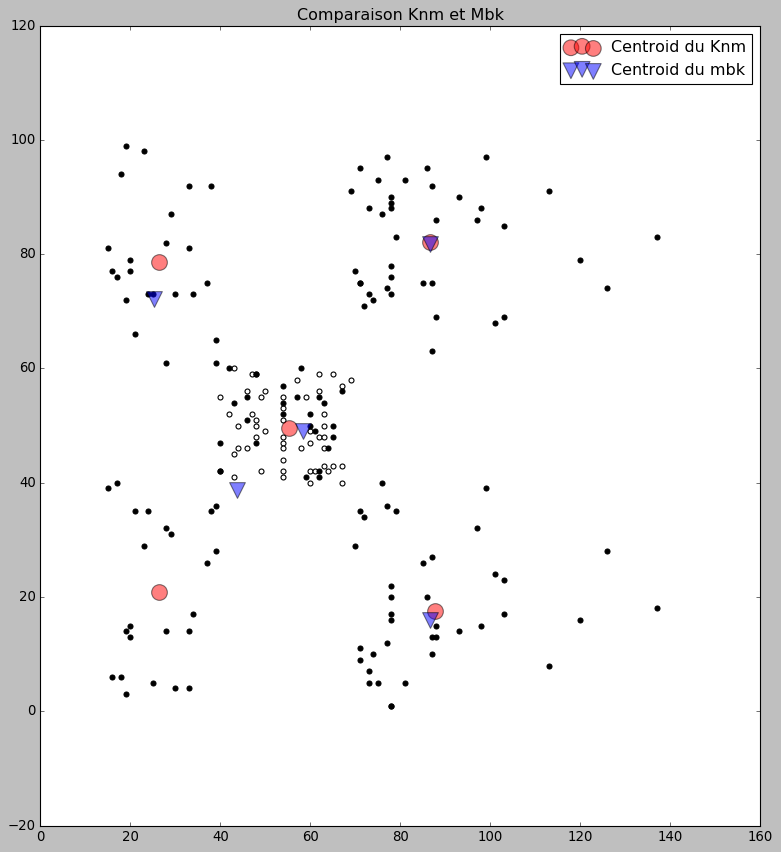

In [100]:
legendes=dfmall.Cluster.unique()
fig=plt.figure( 1,figsize=[9,10])
mpl.style.use('classic')



ax=fig.add_axes([0,0,1,1])
center2 = mbk.cluster_centers_

ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=mbk.labels_)
plt.scatter(center2[:, 1], center2[:, 2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Annual Income x Spending Score')

fig=plt.figure( 2,figsize=[9,10])


center2 = mbk.cluster_centers_
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=knm5.labels_)
plt.scatter(centers[:, 1], centers[:, 2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Annual Income x Spending Score')


fig=plt.figure (3, figsize=[9,10])
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall2.iloc[:,3].loc[dfmall2.iloc[:,6]==dfmall2.iloc[:,8]], dfmall2.iloc[:,4].loc[dfmall2.iloc[:,6]==dfmall2.iloc[:,8]], c="white")
ax.scatter(dfmall2.iloc[:,3].loc[dfmall2.iloc[:,6]!=dfmall2.iloc[:,8]], dfmall2.iloc[:,4].loc[dfmall2.iloc[:,6]!=dfmall2.iloc[:,8]], c="black")
plt.scatter(centers[:, 1], centers[:, 2], marker='o',
            c="red", alpha=0.5, s=200, edgecolor='k',label="Centroid du Knm")
plt.scatter(center2[:, 1], center2[:, 2], marker='v',
            c="blue", alpha=0.5, s=200, edgecolor='k',label="Centroid du mbk")
ax.set_title('Comparaison Knm et Mbk')
plt.legend()
#Comparaison des K-mean et du Mini Batch.
#Ils sont vraiment similaire car nous avons que très peu de données, la séparation du mini Batch se fait
#En 2 fois, c'est pour cela que l'on a des résultats similaires. Mais il ne faut pas trouver sépraer ces
#données en ayant une faible datadabe car l'on risquerai d'avoir des erreurs.

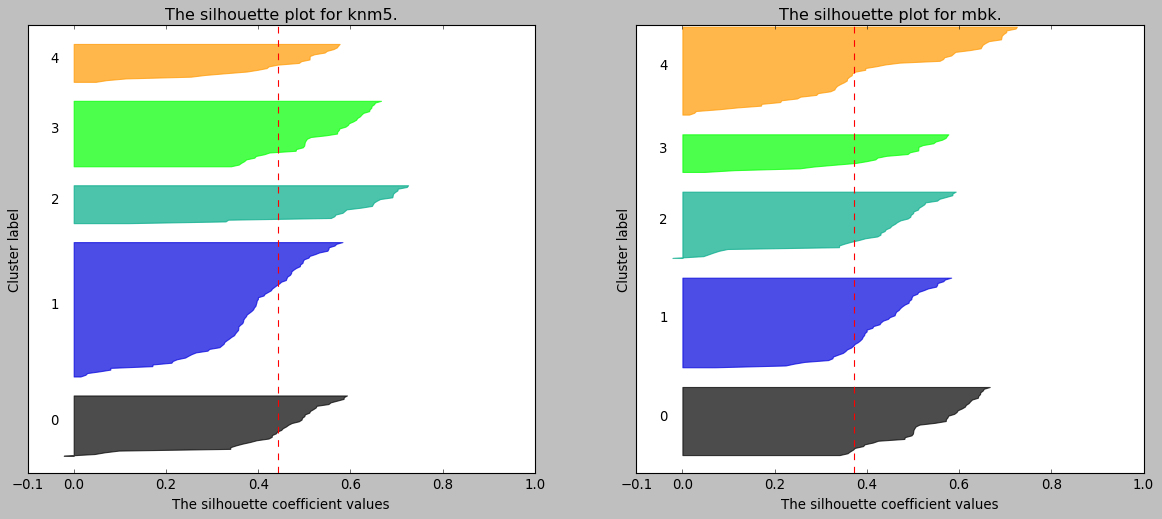

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (5 + 1) * 10])
knm5
mbk
sil= silhouette_score(X, knm5.labels_ )
sil_values = silhouette_samples(X, knm5.labels_)
silbk= silhouette_score(X, mbk.labels_ )
silbk_values= silhouette_samples(X, mbk.labels_)
y_lower = 10
for i in range(5):
        ith_cluster_silhouette_values = \
            sil_values[knm5.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

for i in range(5):
        ith_cluster_silhouette_values = \
            sil_values[dfmall2['Cluster_mbk'] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
        
        
ax1.set_title("The silhouette plot for knm5.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=sil, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

ax2.set_title("The silhouette plot for mbk.")
ax2.set_xlabel("The silhouette coefficient values")
ax2.set_ylabel("Cluster label")
ax2.axvline(x=silbk, color="red", linestyle="--")
ax2.set_yticks([])
ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#Affichage des silhouettes pour le K-mean et le Mini Batch, là aussi c'est très similaire 

In [102]:
print("Mbk Silhouette Score", silbk)
print('Kmn5 Silhouette Score', sil)
#Sur le score on voit que le K-mean est supérieur au mini batch.

Mbk Silhouette Score 0.3729978398882367
Kmn5 Silhouette Score 0.4440669204743008


## Aglomerative Cluster (Historical)

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [103]:
hcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster.fit(X)
hcp = AgglomerativeClustering(distance_threshold=225,n_clusters=None, linkage='ward')
hcp.fit(X)

#L'algorithme a deux méthodes de parametrage on peut choisir N_cluster comme pour kmeans ou choisir un Threshold
#On peut choisir à partir d'un Dendograme plus bas. 
#La ligne rouge qui coupe les lignes du dendogramme représente nos cluster. 
#Avec 225 on obtiens un nombre de cluster similaire qu'avec le Kmeans. 

#hcp= AgglomerativeClustering(distance_threshold=5, affinity='euclidean', linkage='ward')
print('Silhouette Score for Hieararchial Clustering:'+str(silhouette_score(X,hcp.labels_ ,metric='euclidean')))
print('Silhouette Score for hcuster:' +str(silhouette_score(X,hcluster.labels_ ,metric='euclidean')))

Silhouette Score for Hieararchial Clustering:0.43997527212476695
Silhouette Score for hcuster:0.43997527212476695


Nombre de cluster estimé : 5


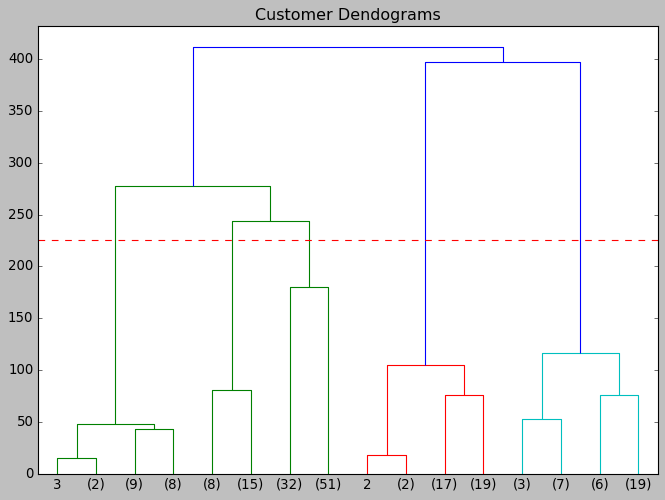

In [115]:

data = X
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
plt
dend = shc.dendrogram(shc.linkage(data, method='ward'),labels= hcp.labels_, truncate_mode="level", p=3)
plt.axhline(y=225,color='red',linestyle="--")
labels_uniqueh = np.unique(hcp.labels_)
clh=len(labels_uniqueh)
print('Nombre de cluster estimé :', clh
      #Affichage de notre dendogram, avec notre seuil à 255 lorsque l'on coupe notre dedograms
      #On arrive bien à nos 5 clusters

Text(0.5, 1.0, 'Vision Annual Income x Spending Score')

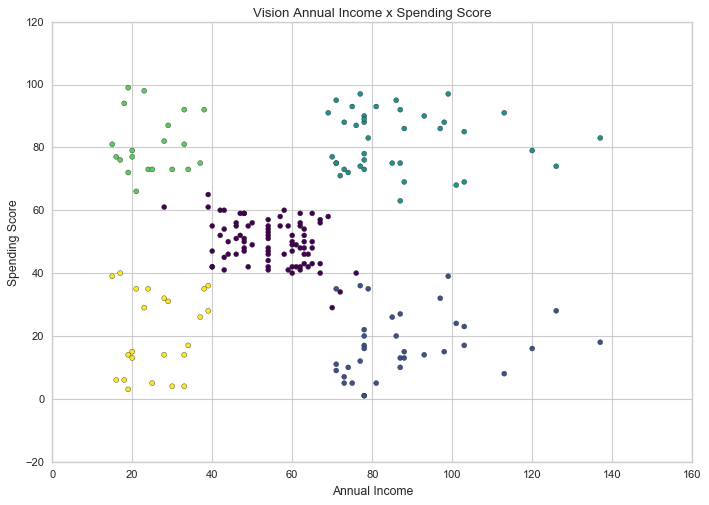

In [126]:
fig=plt.figure(1)

ax=fig.add_axes([0,0,1,1])
ax.scatter(dfmall.iloc[:,3], dfmall.iloc[:,4], c=hcp.labels_, cmap="viridis")
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_title('Vision Annual Income x Spending Score')

In [1]:
dfmall2.to_csv("./dfmallpbi.csv", index=False)

NameError: name 'dfmall2' is not defined